In [1]:
import dataset
from importlib import reload
import skimage
import numpy as np

D:\Github\smlm-dl\smlm_dl\dataset.py:322: RuntimeWarning: invalid value encountered in log
  im = axes[1].imshow(np.log(tiled_images))


15:	 [id = 15.000,], [A = 984.177,], [bg = 22.391,], [x = 6.470,], [y = 1.435,], [z = 0.000,], [sig_x = 5.000,], [sig_y = 5.000,],
8:	 [id = 8.000,], [A = 1587.157,], [bg = 78.404,], [x = -8.103,], [y = 5.978,], [z = 0.000,], [sig_x = 5.000,], [sig_y = 5.000,],
2:	 [id = 2.000,], [A = 1863.967,], [bg = 94.797,], [x = 6.584,], [y = 5.880,], [z = 0.000,], [sig_x = 5.000,], [sig_y = 5.000,],
4:	 [id = 4.000,], [A = 1688.203,], [bg = 4.926,], [x = 0.266,], [y = -3.266,], [z = 0.000,], [sig_x = 5.000,], [sig_y = 5.000,],
9:	 [id = 9.000,], [A = 751.526,], [bg = 37.807,], [x = -4.692,], [y = -4.836,], [z = 0.000,], [sig_x = 5.000,], [sig_y = 5.000,],
0:	 [id = 0.000,], [A = 1262.426,], [bg = 9.483,], [x = -9.177,], [y = 6.158,], [z = 0.000,], [sig_x = 5.000,], [sig_y = 5.000,],
7:	 [id = 7.000,], [A = 1670.713,], [bg = 44.060,], [x = 3.808,], [y = 8.332,], [z = 0.000,], [sig_x = 5.000,], [sig_y = 5.000,],
13:	 [id = 13.000,], [A = 1529.320,], [bg = 51.521,], [x = 5.671,], [y = 8.548,], [z = 

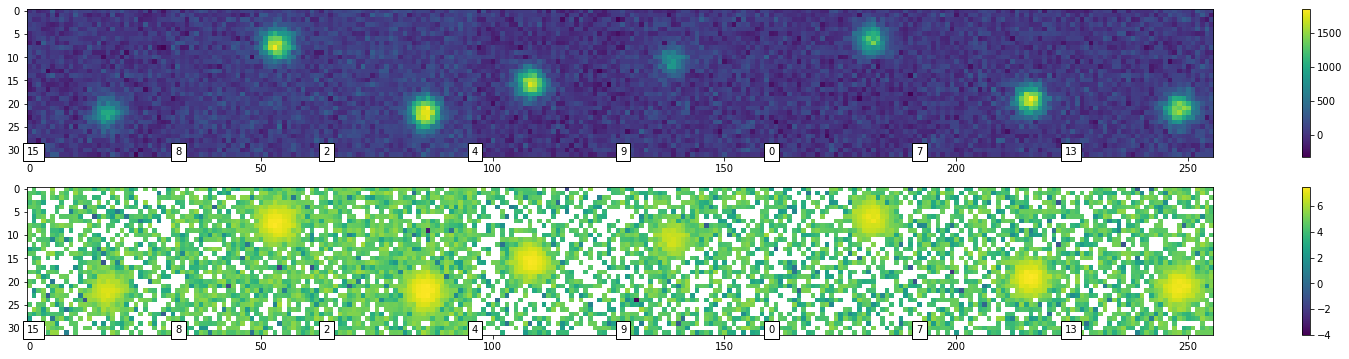

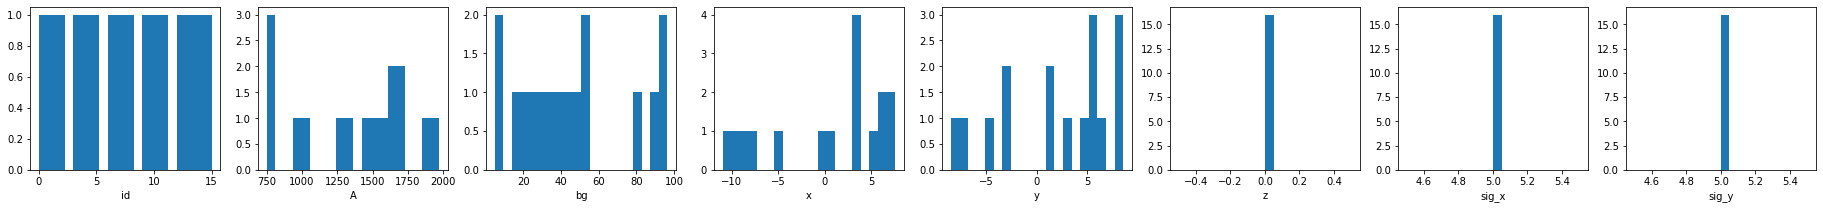

In [2]:
reload(dataset)
a = dataset.Gaussian2DPSFDataset(length=16,)# augmentations={})
dataset.inspect_images(a)

12:	 [id = 12.000,], [A = 1381.636,], [bg = 5.671,], [x = -0.164,], [y = 7.917,], [z = 0.000,],
4:	 [id = 4.000,], [A = 1271.717,], [bg = 9.579,], [x = 10.663,], [y = 2.914,], [z = 0.000,],
14:	 [id = 14.000,], [A = 1765.489,], [bg = 84.335,], [x = 6.117,], [y = 7.383,], [z = 0.000,],
6:	 [id = 6.000,], [A = 514.267,], [bg = 2.925,], [x = 10.978,], [y = -3.970,], [z = 0.000,],
15:	 [id = 15.000,], [A = 688.366,], [bg = 49.931,], [x = 6.369,], [y = -6.671,], [z = 0.000,],
2:	 [id = 2.000,], [A = 1908.200,], [bg = 94.275,], [x = 3.016,], [y = -4.073,], [z = 0.000,],
13:	 [id = 13.000,], [A = 979.588,], [bg = 76.969,], [x = 1.522,], [y = -5.185,], [z = 0.000,],
11:	 [id = 11.000,], [A = 767.031,], [bg = 23.678,], [x = 11.145,], [y = -9.156,], [z = 0.000,],


D:\Github\smlm-dl\smlm_dl\zernike.py:84: UserWarning: Attempting to set identical bottom == top == -0.0 results in singular transformations; automatically expanding.
  ax.set_ylim(-y_lim, y_lim)


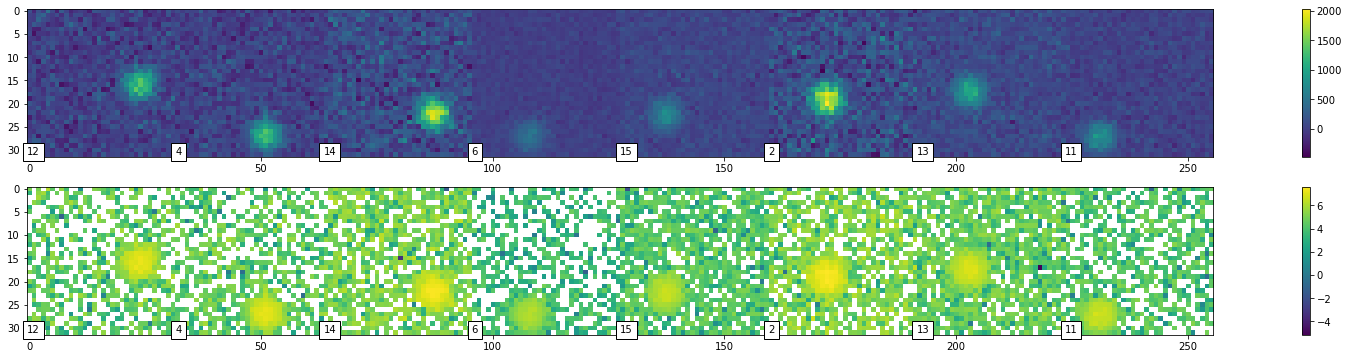

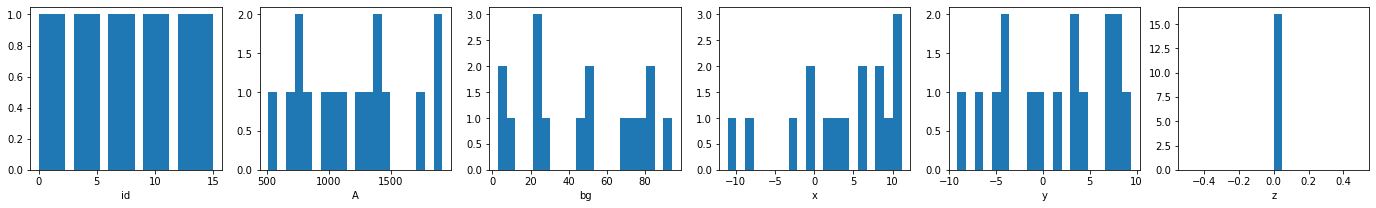

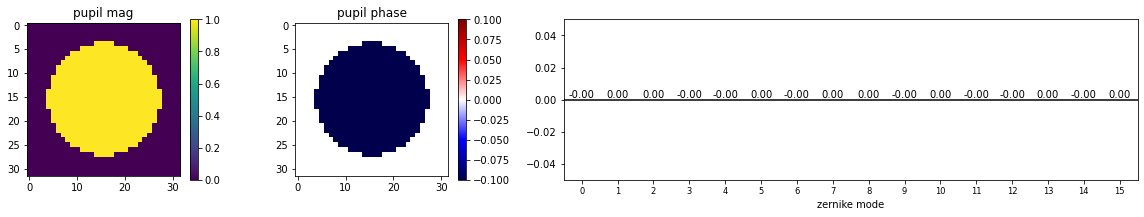

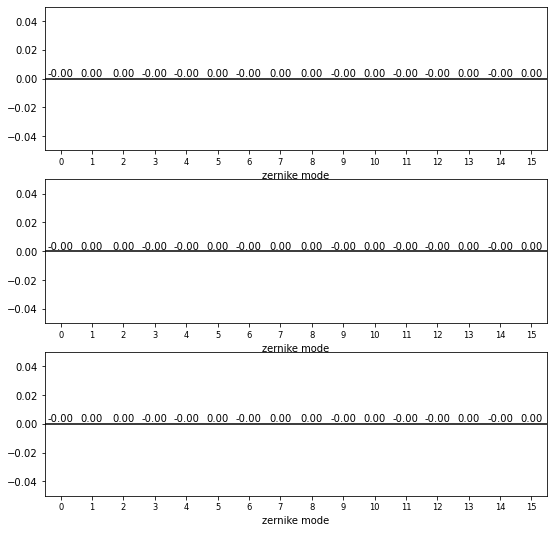

In [3]:
reload(dataset)
import zernike
reload(zernike)

a = dataset.FourierOpticsPSFDataset(length=16,
                                    out_size=(32,32),
                                    psf_zerns={0:0},#, 1:1, 2:0.2, 4:1, 5:2, 7:-2, 9:3},
                                    noise_params={},
                                    augmentations={dataset.Augmentation.NOISE_GAUSSIAN:0.1},
                                    normalize=False) #psf_zerns={4:0, 5:0.5, 7:1})
dataset.inspect_images(a)
# print(a.kx)



import matplotlib.pyplot as plt
fig, axes = plt.subplots(3, 1, figsize=(9, 9))
zernike.plot_zernike_coeffs(axes[0], zernike.fit_zernike_from_pupil(a.pupil, 16, a.pupil_suppl['radial_distance'], a.pupil_suppl['azimuthal_angle']))

correction = zernike.compensate_tip_tilt(np.angle(a.pupil), np.abs(a.pupil) <=0)
corrected_pupil = np.abs(a.pupil) * np.exp(1j * correction)
zernike.plot_zernike_coeffs(axes[1], zernike.fit_zernike_from_pupil(corrected_pupil, 16, a.pupil_suppl['radial_distance'], a.pupil_suppl['azimuthal_angle']))

correction = zernike.compensate_tip_tilt(np.angle(corrected_pupil), np.abs(corrected_pupil) <=0)
corrected_pupil = np.abs(corrected_pupil) * np.exp(1j * correction)
zernike.plot_zernike_coeffs(axes[2], zernike.fit_zernike_from_pupil(corrected_pupil, 16, a.pupil_suppl['radial_distance'], a.pupil_suppl['azimuthal_angle']))

15:	 [id = 15.000,], [A = 917.242,], [bg = 24.805,], [x = 2.270,], [y = -4.413,], [z = 0.000,],
2:	 [id = 2.000,], [A = 1496.032,], [bg = 45.874,], [x = -0.108,], [y = 3.681,], [z = 0.000,],
6:	 [id = 6.000,], [A = 1583.467,], [bg = 85.166,], [x = -6.760,], [y = -4.076,], [z = 0.000,],
7:	 [id = 7.000,], [A = 730.340,], [bg = 27.508,], [x = -5.349,], [y = 4.674,], [z = 0.000,],
1:	 [id = 1.000,], [A = 1833.698,], [bg = 27.638,], [x = 9.466,], [y = 2.324,], [z = 0.000,],
12:	 [id = 12.000,], [A = 1923.661,], [bg = 39.182,], [x = -3.746,], [y = -3.773,], [z = 0.000,],
11:	 [id = 11.000,], [A = 551.210,], [bg = 79.281,], [x = -9.686,], [y = 3.849,], [z = 0.000,],
0:	 [id = 0.000,], [A = 1186.037,], [bg = 1.734,], [x = -7.194,], [y = 4.084,], [z = 0.000,],


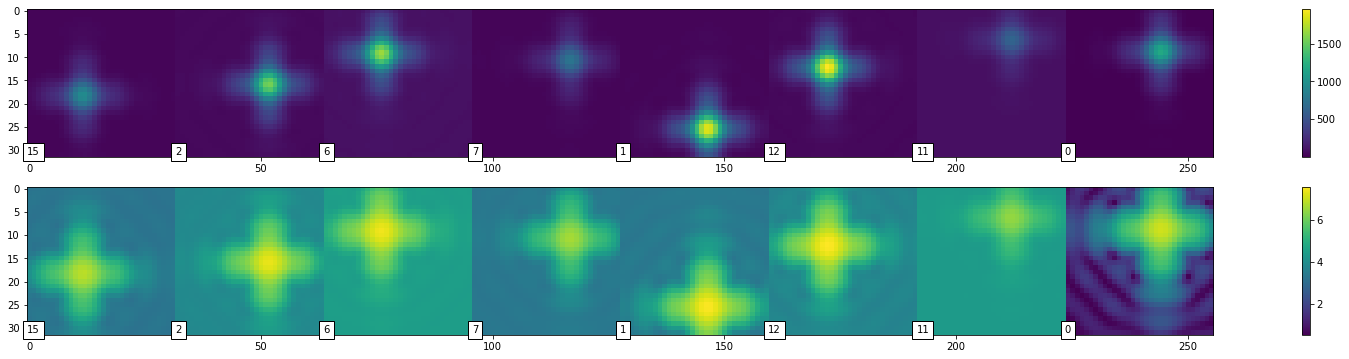

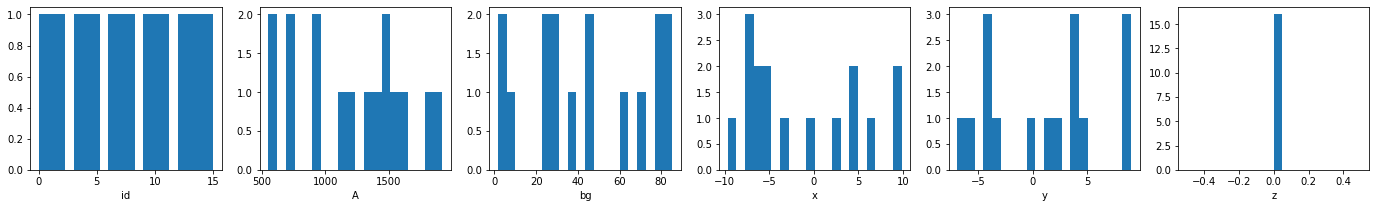

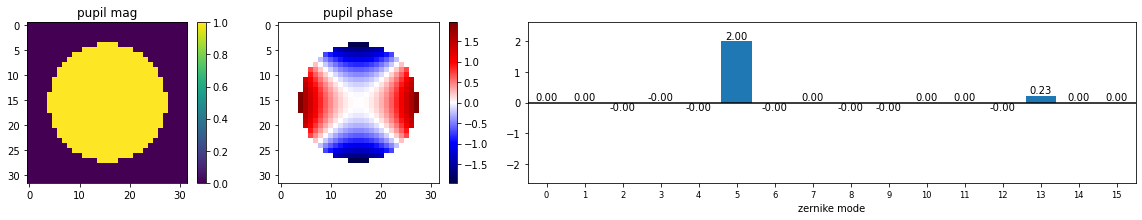

In [4]:
reload(dataset)

a = dataset.FourierOpticsPSFDataset(length=16,
                                      psf_zerns={1:0, 5:2},
                                      noise_params={},
                                      normalize=False,
                                     # psf_params={'pupil_scale':1},
                                     ) #psf_zerns={4:0, 5:0.5, 7:1})
dataset.inspect_images(a)
# print(a.kx)

3:	 [id = 3.000,], [A = 1733.503,], [bg = 3.291,], [x = -1.525,], [y = -8.768,], [z = -9.344,],
0:	 [id = 0.000,], [A = 1560.447,], [bg = 82.929,], [x = -2.988,], [y = 7.541,], [z = -8.748,],
4:	 [id = 4.000,], [A = 1275.893,], [bg = 84.955,], [x = -6.895,], [y = 1.373,], [z = 6.702,],
5:	 [id = 5.000,], [A = 1984.465,], [bg = 92.574,], [x = 2.490,], [y = -0.680,], [z = 0.459,],
7:	 [id = 7.000,], [A = 1794.930,], [bg = 21.607,], [x = -6.359,], [y = -2.763,], [z = 2.952,],
8:	 [id = 8.000,], [A = 1792.198,], [bg = 76.545,], [x = 6.117,], [y = 10.369,], [z = -7.123,],
1:	 [id = 1.000,], [A = 1907.960,], [bg = 70.349,], [x = 0.556,], [y = -6.374,], [z = 4.228,],
15:	 [id = 15.000,], [A = 1949.045,], [bg = 72.598,], [x = 8.099,], [y = -7.648,], [z = 1.835,],


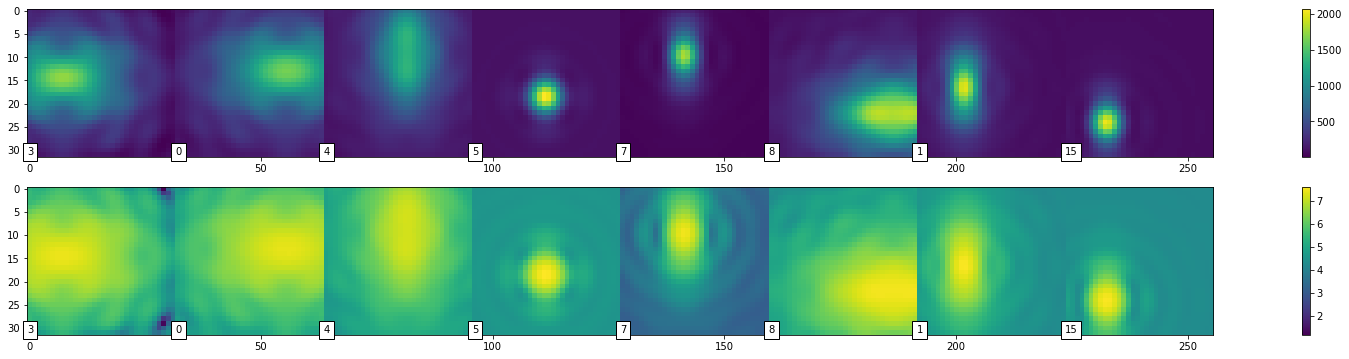

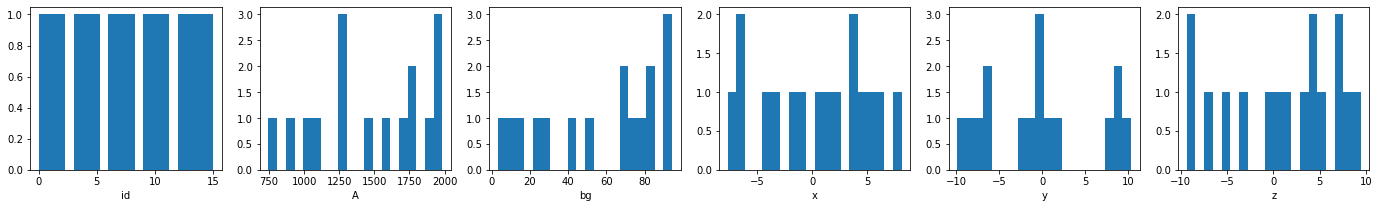

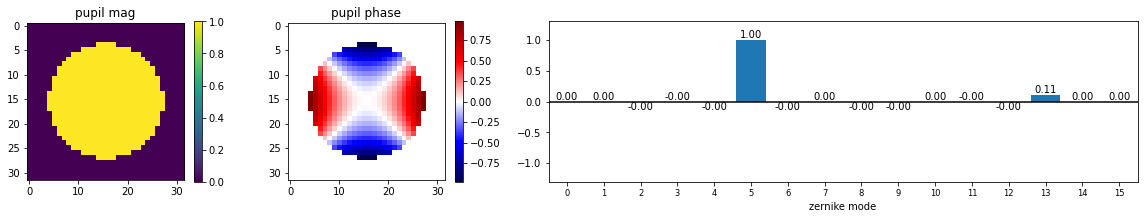

In [5]:
reload(dataset)

a = dataset.FourierOpticsPSFDataset(length=16,
                                    psf_params={'z':[-10,10]},
                                    psf_zerns={1:0, 5:1}, noise_params={}) #psf_zerns={4:0, 5:0.5, 7:1})
dataset.inspect_images(a)

10:	 [id = 10.000,], [A = 508.536, 1864.590, 1515.577, 1288.399, 548.980, 954.025, 1401.888, 1097.124,], [bg = 81.526,], [x = 16.652, 22.043, -5.924, -10.159, -11.356, 18.885, 12.927, 11.946,], [y = -7.590, 6.791, -11.775, -9.397, 15.696, 2.261, -1.284, -14.997,], [z = 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000,], [sig_x = 5.000, 5.000, 5.000, 5.000, 5.000, 5.000, 5.000, 5.000,], [sig_y = 5.000, 5.000, 5.000, 5.000, 5.000, 5.000, 5.000, 5.000,],
8:	 [id = 8.000,], [A = 1685.937, 1135.826, 663.778, 1905.888, 1385.637, 1478.092, 991.848, 817.451,], [bg = 75.582,], [x = 13.667, 10.255, -8.706, 7.736, 8.615, -10.147, 21.337, 5.937,], [y = 8.775, -22.100, -16.454, -14.880, -14.950, -6.863, -5.540, -4.489,], [z = 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000,], [sig_x = 5.000, 5.000, 5.000, 5.000, 5.000, 5.000, 5.000, 5.000,], [sig_y = 5.000, 5.000, 5.000, 5.000, 5.000, 5.000, 5.000, 5.000,],
6:	 [id = 6.000,], [A = 851.196, 1967.023, 1547.199, 1826.697, 899.827, 1410.06

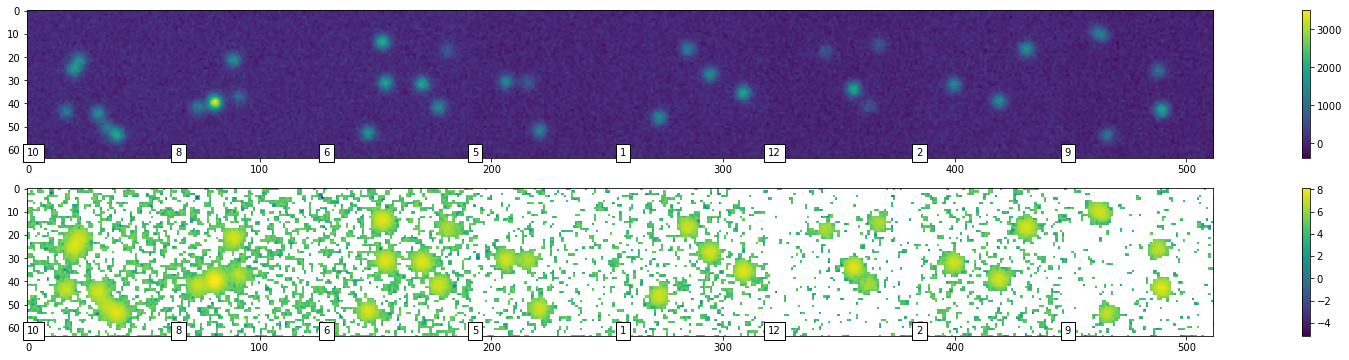

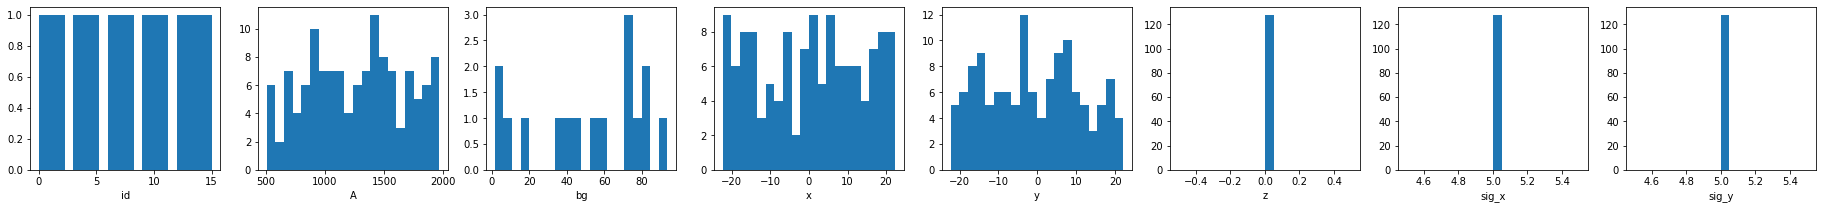

In [6]:
reload(dataset)

a = dataset.Gaussian2DPSFDataset(out_size=(64, 64), length=(16,8), dropout_p=0.5, )
dataset.inspect_images(a)

4:	 [id = 4.000,], [A = 1779.212, 1580.495, 562.922, 1580.307, 1196.424, 692.141, 1237.315, 903.463,], [bg = 96.612,], [x = -13.788, -10.781, -6.208, -11.088, 17.138, 1.863, -7.196, 11.906,], [y = -12.294, -7.260, 18.547, -9.119, 17.465, 6.946, 11.711, 8.651,], [z = 5.719, 5.864, -4.164, 1.388, 5.913, 8.382, 4.445, -8.191,],
7:	 [id = 7.000,], [A = 1805.196, 854.561, 971.614, 1481.529, 1514.494, 1288.788, 1652.712, 1547.383,], [bg = 72.609,], [x = 8.577, -10.538, 20.160, -1.127, -2.695, -19.891, -5.416, 21.717,], [y = -4.616, -10.491, 19.279, 19.934, 14.467, -18.556, 13.607, 19.712,], [z = 8.346, -6.600, -7.666, 1.675, -6.647, 8.205, -2.008, -4.327,],
15:	 [id = 15.000,], [A = 1392.359, 1447.905, 1742.175, 679.797, 1168.358, 1352.374, 794.643, 1343.743,], [bg = 38.336,], [x = -0.744, -6.344, -4.093, 17.854, -4.124, -7.763, -2.105, -22.375,], [y = 0.276, 10.268, -18.652, -12.028, 12.894, 21.331, 3.464, 18.490,], [z = -1.938, 0.976, 6.463, 4.296, -3.745, -5.328, -7.825, -9.212,],
3:	 [id

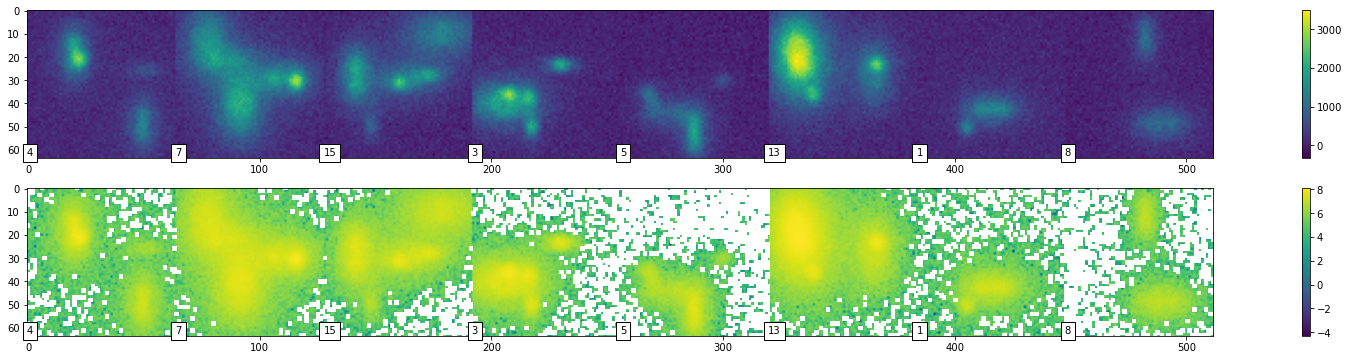

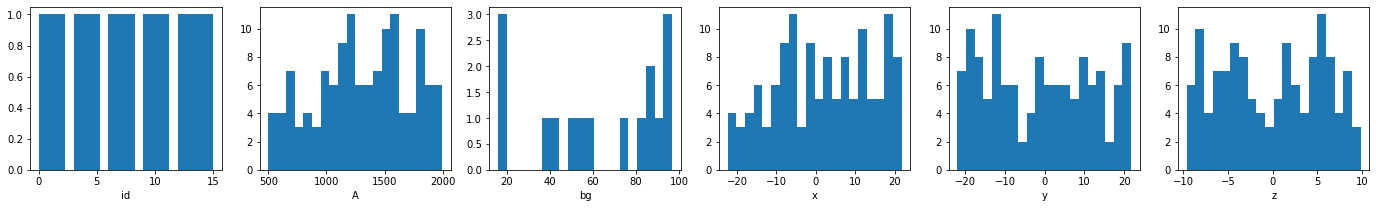

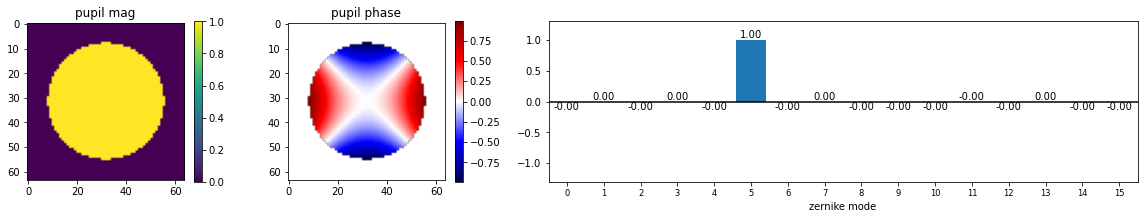

In [7]:
reload(dataset)

a = dataset.FourierOpticsPSFDataset(out_size=(64, 64), length=(16,8),
                                    psf_params={'z':[-10,10]},
                                    dropout_p=0.5, psf_zerns={1:0, 5:1}, ) #psf_zerns={4:0, 5:0.5, 7:1})
dataset.inspect_images(a)
print(a.params.keys())
for key, val in a.params.items():
    print(val.shape)

[-31.5 -30.5 -29.5 -28.5 -27.5 -26.5 -25.5 -24.5 -23.5 -22.5 -21.5 -20.5
 -19.5 -18.5 -17.5 -16.5 -15.5 -14.5 -13.5 -12.5 -11.5 -10.5  -9.5  -8.5
  -7.5  -6.5  -5.5  -4.5  -3.5  -2.5  -1.5  -0.5   0.5   1.5   2.5   3.5
   4.5   5.5   6.5   7.5   8.5   9.5  10.5  11.5  12.5  13.5  14.5  15.5
  16.5  17.5  18.5  19.5  20.5  21.5  22.5  23.5  24.5  25.5  26.5  27.5
  28.5  29.5  30.5  31.5]


D:\Github\smlm-dl\smlm_dl\dataset.py:322: RuntimeWarning: divide by zero encountered in log
  im = axes[1].imshow(np.log(tiled_images))


39:	 [id = 39.000,], [A = 1.000,], [bg = 0.000,], [x = 0.000,], [y = 0.000,], [z = 7.500,],
49:	 [id = 49.000,], [A = 1.000,], [bg = 0.000,], [x = 0.000,], [y = 0.000,], [z = 17.500,],
30:	 [id = 30.000,], [A = 1.000,], [bg = 0.000,], [x = 0.000,], [y = 0.000,], [z = -1.500,],
8:	 [id = 8.000,], [A = 1.000,], [bg = 0.000,], [x = 0.000,], [y = 0.000,], [z = -23.500,],
36:	 [id = 36.000,], [A = 1.000,], [bg = 0.000,], [x = 0.000,], [y = 0.000,], [z = 4.500,],
28:	 [id = 28.000,], [A = 1.000,], [bg = 0.000,], [x = 0.000,], [y = 0.000,], [z = -3.500,],
11:	 [id = 11.000,], [A = 1.000,], [bg = 0.000,], [x = 0.000,], [y = 0.000,], [z = -20.500,],
48:	 [id = 48.000,], [A = 1.000,], [bg = 0.000,], [x = 0.000,], [y = 0.000,], [z = 16.500,],
dict_keys(['id', 'A', 'bg', 'x', 'y', 'z'])


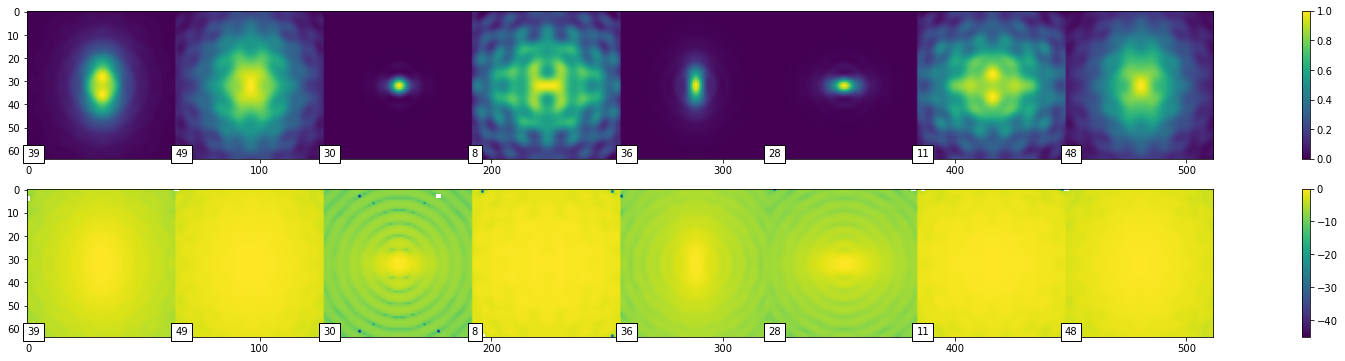

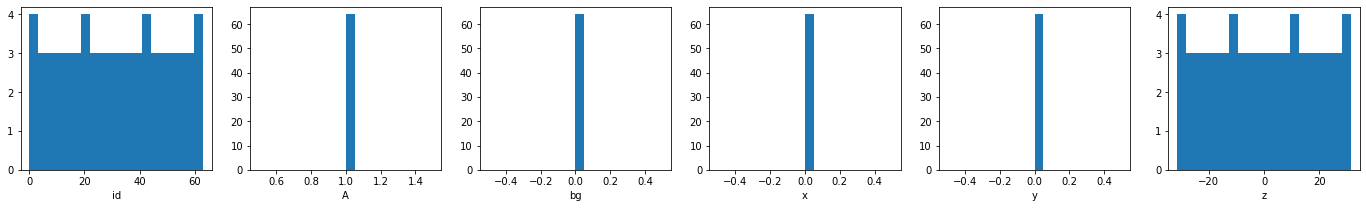

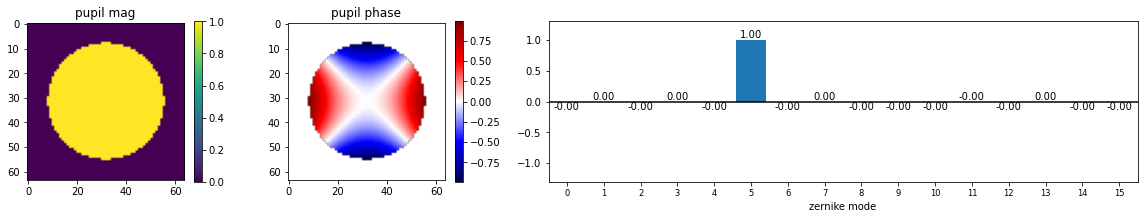

In [8]:
reload(dataset)

length = 64
image_params_preset = {'A': np.ones(length),
                       'x': np.zeros(length),
                       'y': np.zeros(length),
                       'bg': np.zeros(length),
                       'z': np.linspace(-31.5, 31.5, length)}
print(image_params_preset['z'])

a = dataset.FourierOpticsPSFDataset(out_size=(64, 64), length=(length,1),
                                    # psf_params={'z':[-10,10]},
                                    dropout_p=0, psf_zerns={1:0, 5:1},
                                    image_params_preset=image_params_preset,
                                    noise_params ={}
                                   ) #psf_zerns={4:0, 5:0.5, 7:1})
dataset.inspect_images(a)
print(a.params.keys())

3:	 [id = 3.000,], [A = 1.362,], [bg = 1.252,], [x = -2.177,], [y = -5.242,], [z = 0.000,],
5:	 [id = 5.000,], [A = 1.958,], [bg = 1.938,], [x = -0.672,], [y = 5.644,], [z = 0.000,],
2:	 [id = 2.000,], [A = 1.583,], [bg = 9.072,], [x = -0.379,], [y = 1.018,], [z = 0.000,],
0:	 [id = 0.000,], [A = 1.724,], [bg = 1.982,], [x = 4.855,], [y = 4.053,], [z = 0.000,],
1:	 [id = 1.000,], [A = 1.914,], [bg = 0.815,], [x = -1.098,], [y = -8.324,], [z = 0.000,],
4:	 [id = 4.000,], [A = 1.582,], [bg = 1.651,], [x = 3.254,], [y = -6.483,], [z = 0.000,],
7:	 [id = 7.000,], [A = 0.917,], [bg = 4.750,], [x = -0.114,], [y = 2.277,], [z = 0.000,],
6:	 [id = 6.000,], [A = 0.851,], [bg = 6.716,], [x = -2.163,], [y = 5.364,], [z = 0.000,],


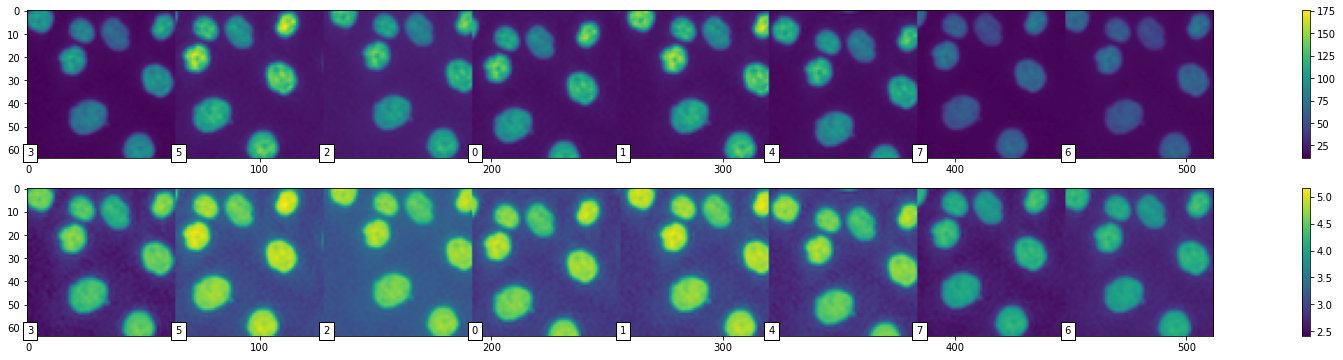

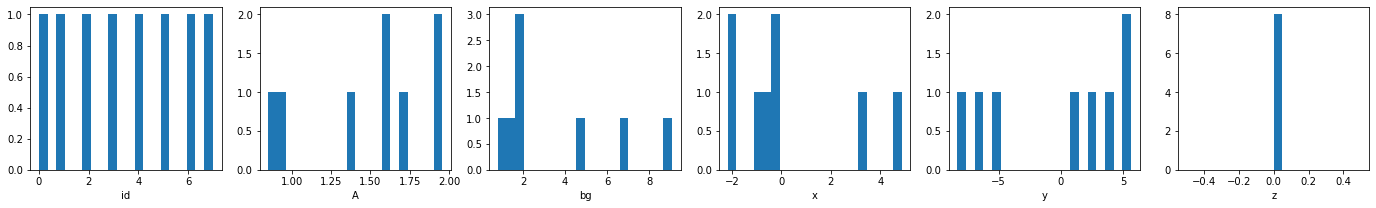

In [9]:
reload(dataset)

a = dataset.SingleImageDataset(skimage.data.human_mitosis()[20:, 20:], out_size=(64,64), length=8,
                               image_params={'x':[-5, +5],
                                             'y':[-10, +10],
                                           # 'conv':np.ones((3,3)),
                                          },
                               noise_params={}, augmentations={}, normalize=False)
dataset.inspect_images(a)